In [20]:
import pandas as pd
import numpy as np


In [21]:
df = pd.read_csv('C:/Users/jaehong/Documents/GitHub/Project_0101/AS_Management_Data.csv')


In [22]:
df

,접수날짜,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품,수리비용,수리비용청구여부
0,2022-11-07,기능,화면,동작안함,스위치고장,무상,제품교환,스위치 PCB Board Ass'y,25000,미청구
1,2022-10-18,기능,화면,켜지지 않음,배터리 방전,무상,부품교체,Battery,30000,미청구
2,2023-03-20,기능,화면,동작안함,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구
3,2021-09-06,외관,오염,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구
4,2021-02-22,기능,화면,켜지지 않음,배터리 방전,유상,부품교체,Battery,30000,30000
...,...,...,...,...,...,...,...,...,...,...
9995,2021-09-27,외관,오염,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000
9996,2021-10-03,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구
9997,2022-04-23,기능,화면,두번 터치됨,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구
9998,2022-02-27,외관,흠집,케이스,검수미비,무상,제품교환,케이스,20000,미청구


In [23]:
df.isna().sum()

접수날짜        0
불량유형_대      0
불량유형_중      0
불량유형_소      0
원인          0
유상/무상       0
처리내역        0
수리부품        0
수리비용        0
수리비용청구여부    0
dtype: int64

In [24]:
df.describe()

,수리비용
count,10000.000000
mean,44677.400000
std,26204.327809
min,3000.000000
25%,20000.000000
50%,45000.000000
75%,80000.000000
max,80000.000000


In [25]:
df.head(3)

,접수날짜,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품,수리비용,수리비용청구여부
0,2022-11-07,기능,화면,동작안함,스위치고장,무상,제품교환,스위치 PCB Board Ass'y,25000,미청구
1,2022-10-18,기능,화면,켜지지 않음,배터리 방전,무상,부품교체,Battery,30000,미청구
2,2023-03-20,기능,화면,동작안함,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구


### 접수날짜 내림차순 정렬

In [26]:
df_sorted = df.sort_values(by='접수날짜', ascending=True)

In [27]:
df_sorted

,접수날짜,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품,수리비용,수리비용청구여부
3977,2021-01-01,외관,오염,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구
7867,2021-01-01,외관,흠집,케이스,검수미비,무상,제품교환,케이스,20000,미청구
5091,2021-01-01,기능,화면,백화현상,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구
7808,2021-01-01,외관,흠집,케이스,검수미비,무상,제품교환,케이스,20000,미청구
5503,2021-01-01,기능,화면,안켜짐,컨넥터 이탈,무상,부품교체,컨넥터 Ass'y,18000,미청구
...,...,...,...,...,...,...,...,...,...,...
4339,2023-05-31,기능,화면,켜지지 않음,휴즈 끊어짐,무상,부품교체,Fuse,3000,미청구
5215,2023-05-31,기능,화면,백화현상,컨넥터 접촉불량,무상,부품교체,컨넥터 Ass'y,18000,미청구
9904,2023-05-31,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구
7735,2023-05-31,외관,오염,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구


### 접수일자별 A/S접수 건수

In [29]:
df_sorted['접수날짜'].value_counts()

2021-06-13    22
2022-03-16    22
2021-04-26    22
2021-10-20    21
2021-05-25    21
              ..
2022-12-24     3
2022-03-22     3
2023-03-23     3
2021-11-05     3
2022-07-01     3
Name: 접수날짜, Length: 881, dtype: int64

In [30]:
import matplotlib.pyplot as plt

In [31]:
# '접수날짜' 열을 날짜 형식으로 변환
df['접수날짜'] = pd.to_datetime(df['접수날짜'])

In [32]:
# '연도' 열 추가
df['연도'] = df['접수날짜'].dt.year

In [33]:
df

,접수날짜,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품,수리비용,수리비용청구여부,연도
0,2022-11-07,기능,화면,동작안함,스위치고장,무상,제품교환,스위치 PCB Board Ass'y,25000,미청구,2022
1,2022-10-18,기능,화면,켜지지 않음,배터리 방전,무상,부품교체,Battery,30000,미청구,2022
2,2023-03-20,기능,화면,동작안함,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2023
3,2021-09-06,외관,오염,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2021
4,2021-02-22,기능,화면,켜지지 않음,배터리 방전,유상,부품교체,Battery,30000,30000,2021
...,...,...,...,...,...,...,...,...,...,...,...
9995,2021-09-27,외관,오염,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021
9996,2021-10-03,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021
9997,2022-04-23,기능,화면,두번 터치됨,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구,2022
9998,2022-02-27,외관,흠집,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2022


In [34]:
# 연도별 접수 수 계산
year_counts = df['연도'].value_counts().sort_index()

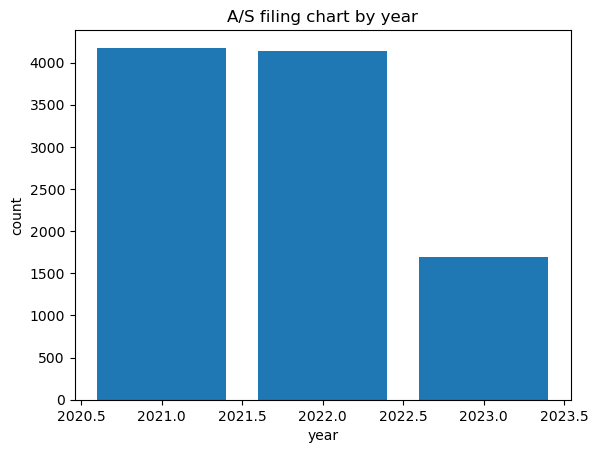

In [36]:
# 막대 그래프 그리기
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('year')
plt.ylabel('count')
plt.title('A/S filing chart by year')
plt.show()

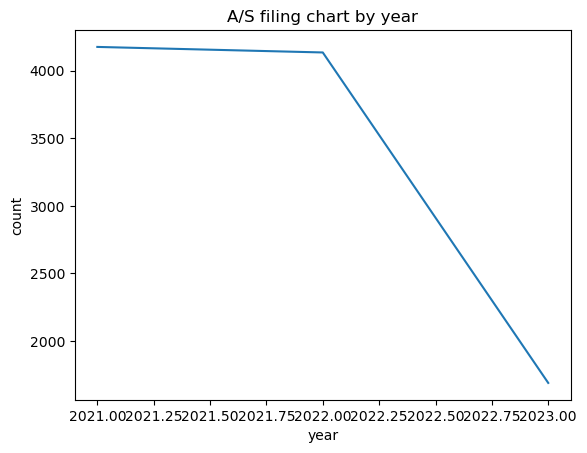

In [37]:
# 꺽은선 그래프 그리기
plt.plot(year_counts.index, year_counts.values)
plt.xlabel('year')
plt.ylabel('count')
plt.title('A/S filing chart by year')
plt.show()

In [40]:
# '년월' 열 추가 (년과 월로 추출하여 'YYYY-MM' 형식으로 저장)
df['년월'] = df['접수날짜'].dt.to_period('M')

In [41]:
df

,접수날짜,불량유형_대,불량유형_중,불량유형_소,원인,유상/무상,처리내역,수리부품,수리비용,수리비용청구여부,연도,년월
0,2022-11-07,기능,화면,동작안함,스위치고장,무상,제품교환,스위치 PCB Board Ass'y,25000,미청구,2022,2022-11
1,2022-10-18,기능,화면,켜지지 않음,배터리 방전,무상,부품교체,Battery,30000,미청구,2022,2022-10
2,2023-03-20,기능,화면,동작안함,스위치고장,무상,부품교체,스위치 PCB Board Ass'y,25000,미청구,2023,2023-03
3,2021-09-06,외관,오염,액정,검수미비,무상,제품교환,액정 Ass'y,80000,미청구,2021,2021-09
4,2021-02-22,기능,화면,켜지지 않음,배터리 방전,유상,부품교체,Battery,30000,30000,2021,2021-02
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2021-09-27,외관,오염,액정,사용자 과실,유상,부품교체,액정 Ass'y,80000,80000,2021,2021-09
9996,2021-10-03,외관,파손,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2021,2021-10
9997,2022-04-23,기능,화면,두번 터치됨,Pcb Board 고장,무상,부품교체,MAIN Pcb Board,50000,미청구,2022,2022-04
9998,2022-02-27,외관,흠집,케이스,검수미비,무상,제품교환,케이스,20000,미청구,2022,2022-02


In [45]:
# 연월별 접수 수 계산
y_m_counts = df['년월'].value_counts().sort_index()

In [46]:
y_m_counts

2021-01    366
2021-02    326
2021-03    366
2021-04    315
2021-05    363
2021-06    335
2021-07    348
2021-08    320
2021-09    372
2021-10    355
2021-11    346
2021-12    364
2022-01    351
2022-02    309
2022-03    357
2022-04    342
2022-05    356
2022-06    352
2022-07    347
2022-08    382
2022-09    345
2022-10    305
2022-11    357
2022-12    332
2023-01    361
2023-02    319
2023-03    338
2023-04    318
2023-05    353
Freq: M, Name: 년월, dtype: int64

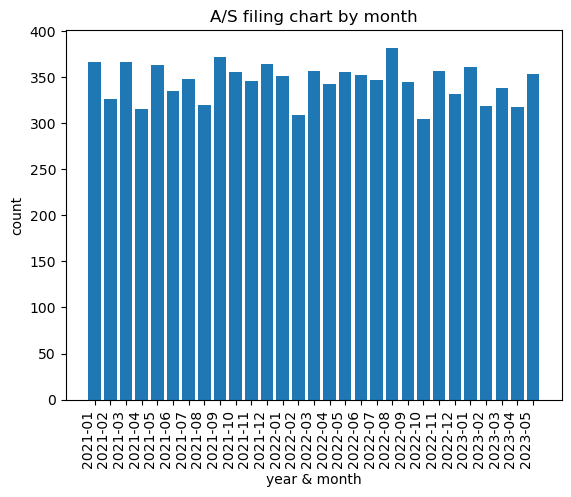

In [55]:
# 막대 그래프 그리기
plt.bar(y_m_counts.index.astype(str), y_m_counts.values)
bar_width = 0.8
plt.xlabel('year & month')
plt.ylabel('count')
plt.title('A/S filing chart by month')
plt.xticks(rotation=90, ha='right')
plt.show()

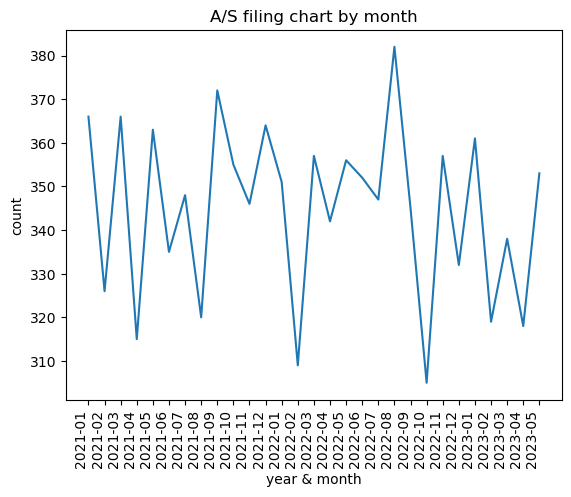

In [59]:
# 막대 그래프 그리기
plt.plot(y_m_counts.index.astype(str), y_m_counts.values)
plt.xlabel('year & month')
plt.ylabel('count')
plt.title('A/S filing chart by month')
plt.xticks(rotation=90, ha='right')
plt.show()
